<a href="https://colab.research.google.com/github/jashasmani/Depp-Learning/blob/main/Linear_Regrasion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('/content/demodata.csv')
data

,Age,Weight
0,5,18
1,6,20
2,7,19
3,9,21
4,10,32
5,12,30
6,13,25
7,16,30
8,15,30
9,14,28


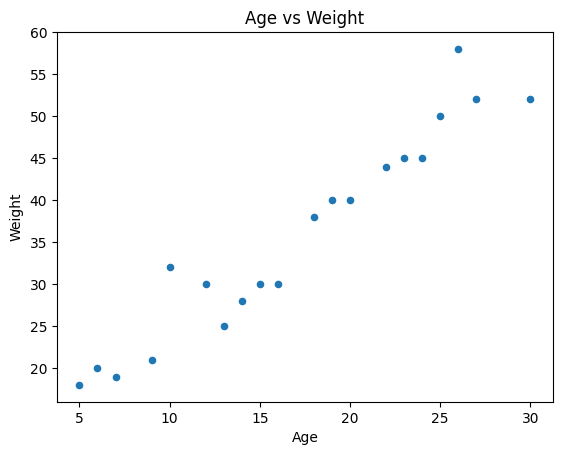

In [15]:
# Plot the data points
data.plot(kind="scatter", x="Age", y="Weight")
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Age vs Weight')
plt.show()

In [13]:
def predict_y(X, weight, bias):
    return weight*X + bias

In [7]:
def cost_function(X, y, weight, bias):
    totalrecords = len(X)
    total_error = 0.0
    for i in range(totalrecords):
        total_error += (y[i] - (weight*X[i] + bias))**2
    return total_error / totalrecords

In [8]:
def update_weights(X, y, weight, bias, learning_rate):
    weight_deriv = 0
    bias_deriv = 0
    totalrecords = len(X)

    for i in range(totalrecords):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        weight_deriv += -2*X[i] * (y[i] - (weight*X[i] + bias))

        # -2(y - (mx + b))
        bias_deriv += -2*(y[i] - (weight*X[i] + bias))

    # We subtract because the derivatives point in direction of steepest ascent
    weight -= (weight_deriv / totalrecords) * learning_rate
    bias -= (bias_deriv / totalrecords) * learning_rate

    return weight, bias

In [9]:
def train(X, y, weight, bias, learning_rate, iters):
    cost_history = []

    for i in range(iters):
        weight,bias = update_weights(X, y, weight, bias, learning_rate)

        #Calculate cost for auditing purposes
        cost = cost_function(X, y, weight, bias)
        cost_history.append(cost)

        # Log Progress
        if i % 10 == 0:
            print("iter={:d}    weight={:.2f}    bias={:.4f}    cost(MSE)={:.2}".format(i, weight, bias, cost))


    return weight, bias

In [29]:
X = data['Age'].values
y = data['Weight'].values
weight = 0
bias = 0
lr = 0.0001
iters = 100
weight,bias=train(X,y,weight,bias,lr,iters)
print("The weight and bias learnt are::  weight={:f}    bias={:.4f}    ".format(weight, bias))

iter=0    weight=0.14    bias=0.0072    cost(MSE)=1240.80
iter=10    weight=1.10    bias=0.0574    cost(MSE)=314.35
iter=20    weight=1.57    bias=0.0835    cost(MSE)=92.71
iter=30    weight=1.80    bias=0.0976    cost(MSE)=39.68
iter=40    weight=1.91    bias=0.1059    cost(MSE)=26.99
iter=50    weight=1.96    bias=0.1114    cost(MSE)=23.95
iter=60    weight=1.99    bias=0.1155    cost(MSE)=23.21
iter=70    weight=2.00    bias=0.1189    cost(MSE)=23.03
iter=80    weight=2.01    bias=0.1220    cost(MSE)=22.98
iter=90    weight=2.01    bias=0.1250    cost(MSE)=22.96
The weight and bias learnt are::  weight=2.012344    bias=0.1275    


In [30]:

# d=int(input('Enter the number of components for which you need prediction related to how many  years of maintainece it would need '))

d=24
we=predict_y(d, weight, bias)
print('It would need ')
print(we)

It would need 
48.423777627609304


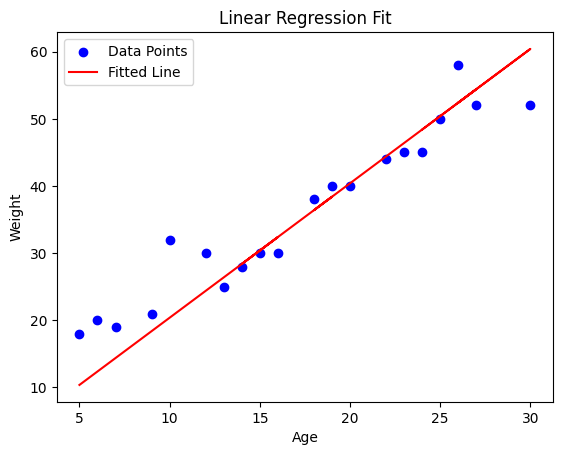

In [21]:
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, predict_y(X, weight, bias), color='red', label='Fitted Line')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()